In [1]:
import numpy as np
import pandas as pd

import pandas_datareader.data as web

from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

from statsmodels.tsa.api import ARIMA

# настройки визуализации
import matplotlib.pyplot as plt

# Не показывать Warnings
import warnings
warnings.simplefilter(action='ignore', category=Warning)

In [2]:
y = web.DataReader(name='GS10', data_source='fred', start='2000-01')

## Разбиение на обучающую и тестовую выборки

### Расширяющаяся обучающая выборки

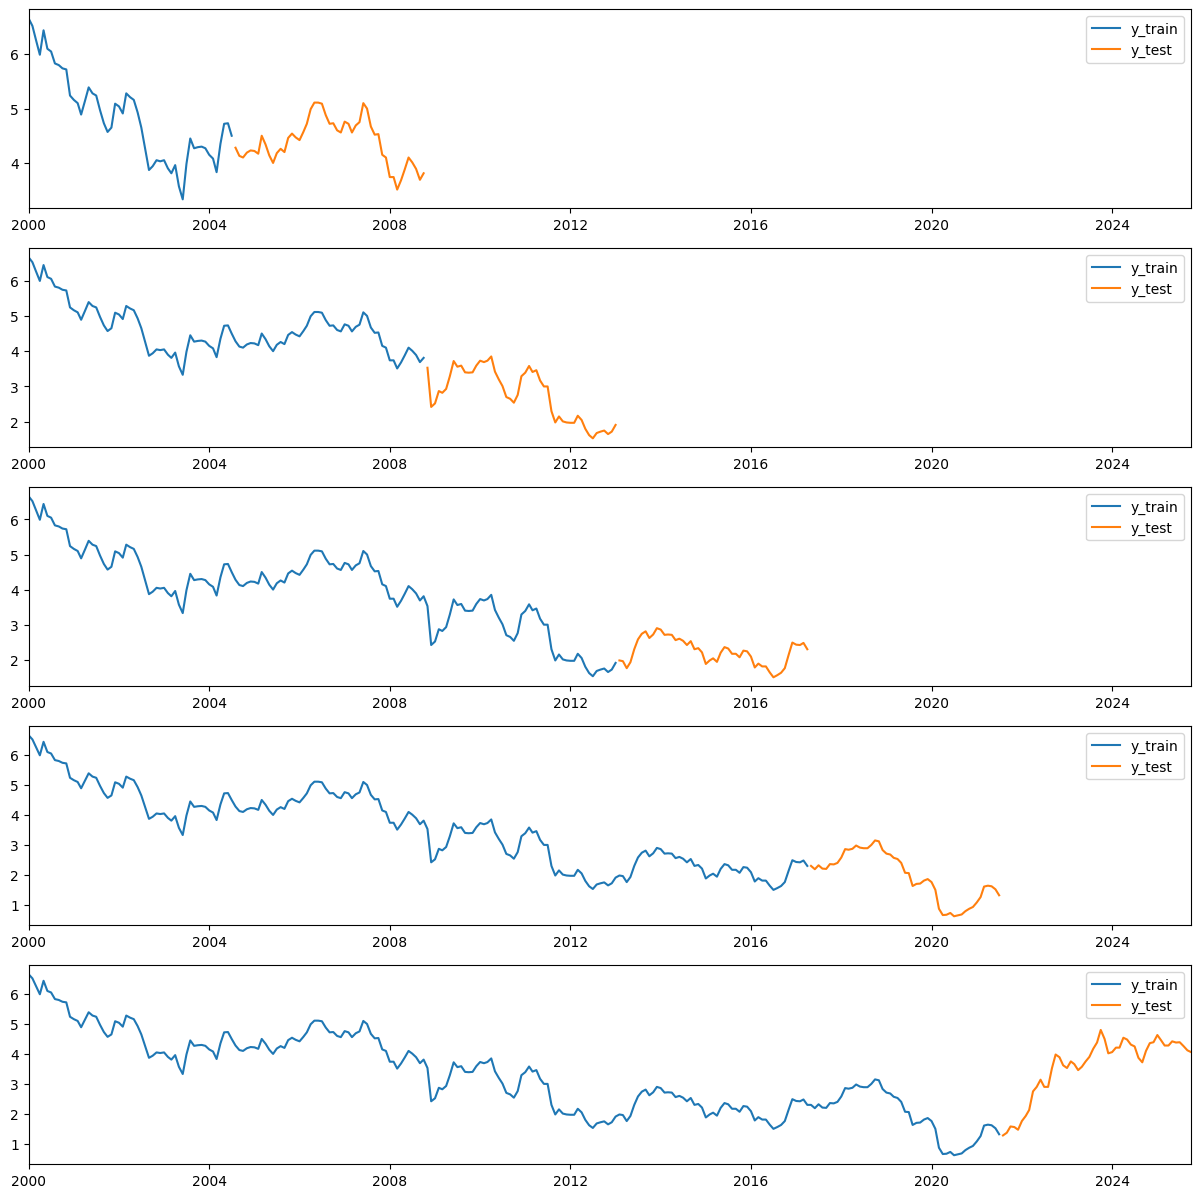

In [3]:
N_SPLITS = 5

folds = TimeSeriesSplit(n_splits=N_SPLITS)

fig, axs = plt.subplots(nrows=N_SPLITS, ncols=1, figsize=(15, 3*N_SPLITS))

for i, (train_index, valid_index) in enumerate(folds.split(y)):
	axs[i].set_xlim(left=y.index[0], right=y.index[-1])
	axs[i].plot(y.iloc[train_index], label='y_train')
	axs[i].plot(y.iloc[valid_index], label='y_test')
	axs[i].legend()


### Скользящая обучающая выборки

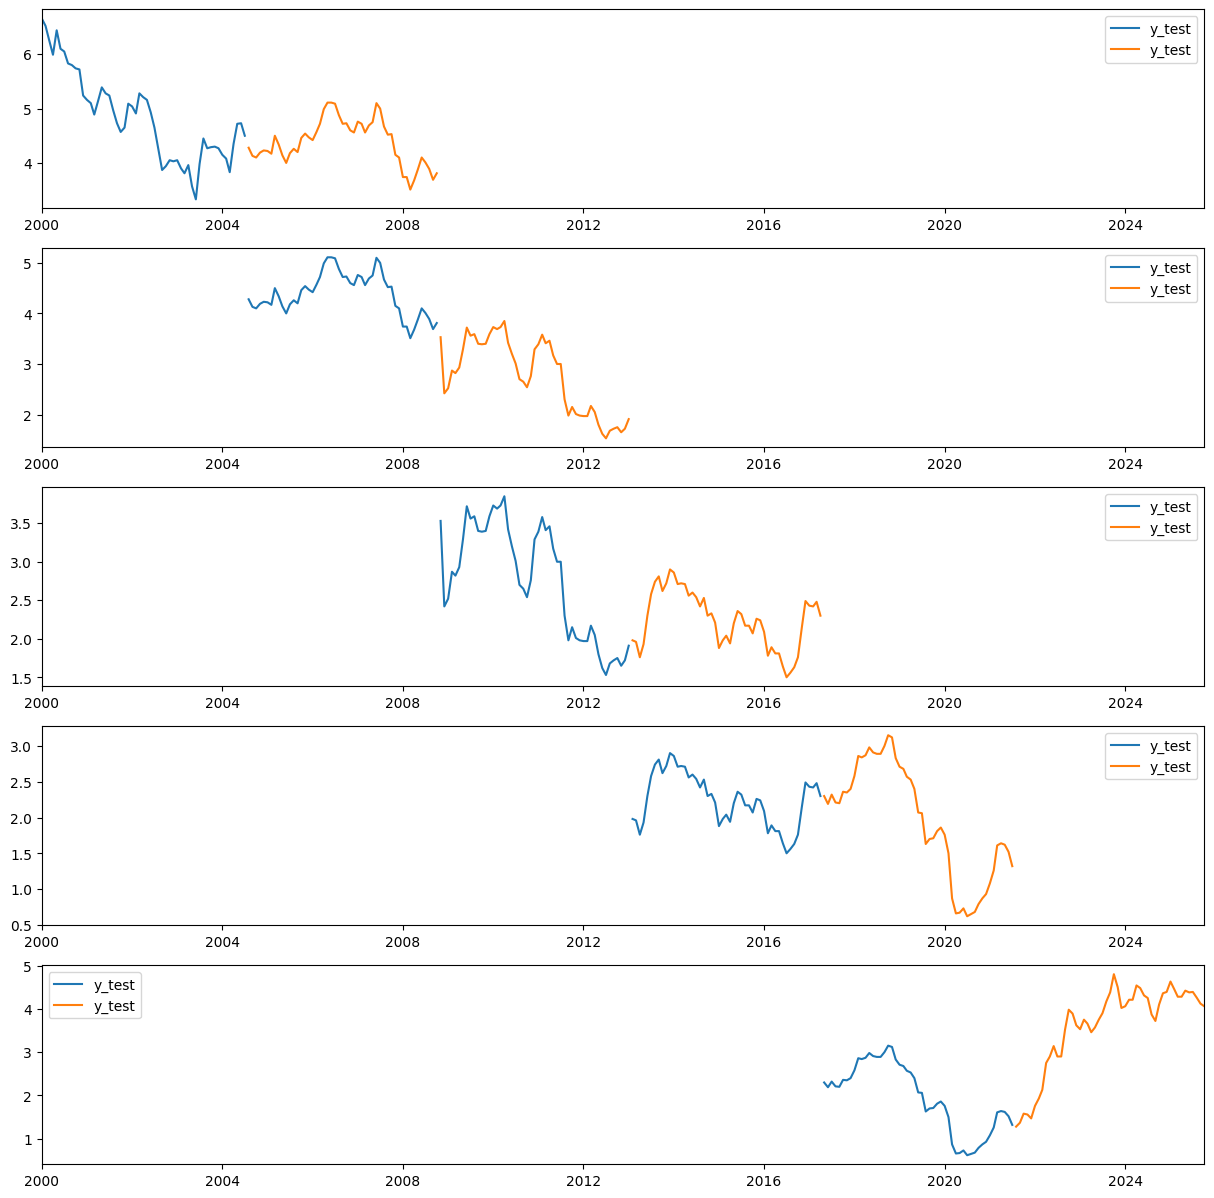

In [4]:
N_SPLITS = 5

folds = TimeSeriesSplit(n_splits=N_SPLITS)

fig, axs = plt.subplots(nrows=N_SPLITS, ncols=1, figsize=(15, 3*N_SPLITS))

start_train=0

for i, (train_index, valid_index) in enumerate(folds.split(y)):
	axs[i].set_xlim(left=y.index[0], right=y.index[-1])
	axs[i].plot(y.iloc[train_index[start_train:]],  label='y_test')
	axs[i].plot(y.iloc[valid_index], label='y_test')
	axs[i].legend()
	start_train = train_index[-1]+1

## Обучающая и тестовая выборки и прогноз

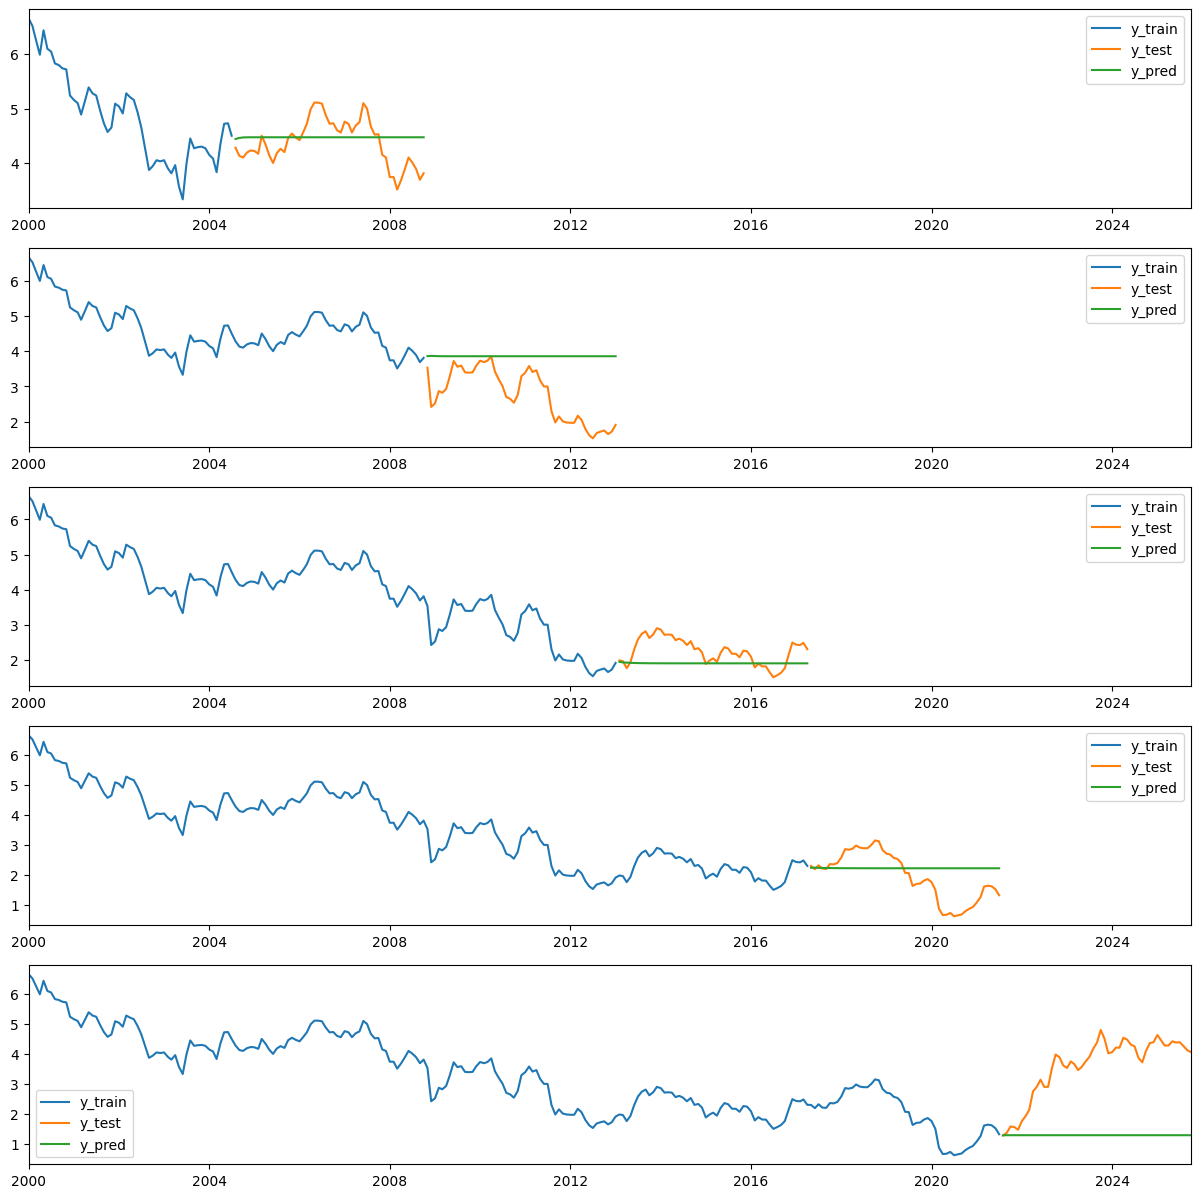

In [5]:
N_SPLITS = 5

folds = TimeSeriesSplit(n_splits=N_SPLITS)

fig, axs = plt.subplots(nrows=N_SPLITS, ncols=1, figsize=(15, 3*N_SPLITS))

for i, (train_index, valid_index) in enumerate(folds.split(y)):
	axs[i].set_xlim(left=y.index[0], right=y.index[-1])
	axs[i].plot(y.iloc[train_index], label='y_train')
	axs[i].plot(y.iloc[valid_index], label='y_test')

	mod = ARIMA(y.iloc[train_index], order=(2,1,2), trend='n')
	res = mod.fit()
	y_pred = res.forecast(steps = len(valid_index))
	axs[i].plot(y_pred, label='y_pred')

	axs[i].legend()

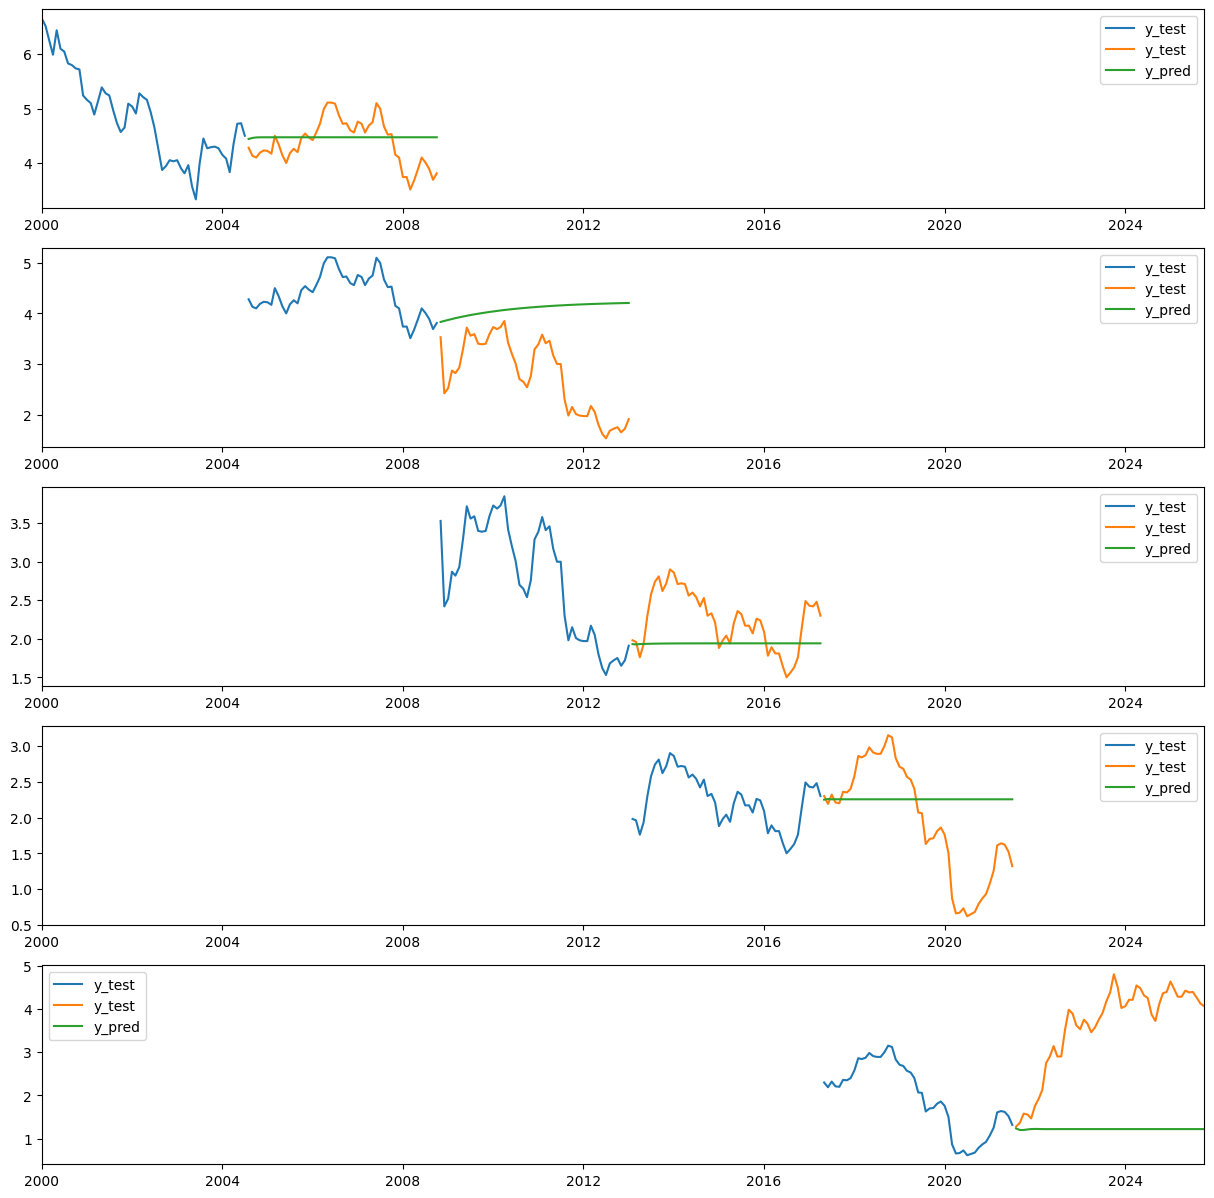

In [6]:
N_SPLITS = 5

folds = TimeSeriesSplit(n_splits=N_SPLITS)

fig, axs = plt.subplots(nrows=N_SPLITS, ncols=1, figsize=(15, 3*N_SPLITS))

start_train=0

for i, (train_index, valid_index) in enumerate(folds.split(y)):
	axs[i].set_xlim(left=y.index[0], right=y.index[-1])
	axs[i].plot(y.iloc[train_index[start_train:]],  label='y_test')
	axs[i].plot(y.iloc[valid_index], label='y_test')

	mod = ARIMA(y.iloc[train_index[start_train:]], order=(2,1,2), trend='n')
	res = mod.fit()
	y_pred = res.forecast(steps = len(valid_index))
	axs[i].plot(y_pred, label='y_pred')

	axs[i].legend()
	start_train = train_index[-1]+1